In [40]:
import pencil as pc
import matplotlib.pyplot as plt
import numpy as np
import modes

In [3]:
sim = pc.get_sim(quiet=True)
xyaver = pc.read.aver(plane_list=['xy'])
ts = pc.read.ts()
yaver = pc.read.aver(plane_list='y')

Read 3814 lines.


In [34]:
class kom(modes.Modes):
    def __init__(self, t1, t2, z_ref, sim, ts, xyaver, yaver, ini=False, dyn=True):
        super().__init__(sim, ts, xyaver, yaver, ini=False, dyn=True)

        # self.a = super().gamma
        self.t1 = t1
        self.t2 = t2
        self.z_ref = z_ref

        self.indx_t1 = np.argmin(np.abs(self.yaver.t - self.t1))  #to avoid the transient effects below t=170
        self.indx_t2 = np.argmin(np.abs(self.yaver.t - self.t2))

        self.uz_real = self.yaver.y.uzmxz[self.indx_t1:self.indx_t2,:,self.z_ref]
        self.uz_fourier = super().FT(self.uz_real, 'ortho')
        self.log_P = super().logP(self.uz_fourier, self.d)
        self.om_til = super().omega_tilde(self.indx_t1, self.indx_t2)
        self.k_til = super().k_tilde()

        pi = np.pi
        self.xx = np.linspace(0,2*pi,100)
        self.kf = self.get_kf()



    def plot(self, vmin, detailed=False):
        levels = np.linspace(-4, np.max(self.log_P), 1000)
        vmax = np.max(self.log_P)

        [X, Y] = np.meshgrid(self.k_til, self.om_til)

        fig = plt.figure(figsize=(7,5))
        ax = fig.add_subplot(1,1,1)
        img = ax.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(self.log_P), levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
        if detailed:
            plt.plot(self.xx, np.sqrt(self.gz*self.xx/(self.omega0**2*self.L0)), 'k')
            plt.plot(self.xx, np.sqrt(self.gz*self.xx/(self.omega0**2*self.L0)*(1-self.q)/(1+self.q)), ls='dotted', c='k')
            # plt.plot(self.k_til, np.sqrt(self.gz*self.k_til/(self.omega0**2*self.L0)), 'k')
            # plt.plot(self.k_til, np.sqrt(self.gz*self.k_til/(self.omega0**2*self.L0)*(1-self.q)/(1+self.q)), ls='dotted', c='k')
            plt.plot(self.k_til, self.cs_d*self.k_til/(self.omega0*self.L0), ls='--', c='k')
            plt.plot(self.k_til, self.cs_u*self.k_til/(self.omega0*self.L0), ls=':', c='k')

        plt.xlim(-self.kf,self.kf)
        plt.ylim(-np.pi,np.pi)
        cbar = fig.colorbar(img, cax=None, ax=ax)
        ticks = np.arange(vmin, vmax)
        cbar.set_ticks(ticks)
        plt.xlabel(r"$\tilde{k}_x$")
        plt.ylabel(r"$\tilde{\omega}$")
        # plt.savefig('k_om.png')
        plt.show()
    pass

In [35]:
img = kom(150, 670, 230, sim, ts, xyaver, yaver, ini=False, dyn=True)

In [36]:
np.max(img.log_P)

5.564801078287591

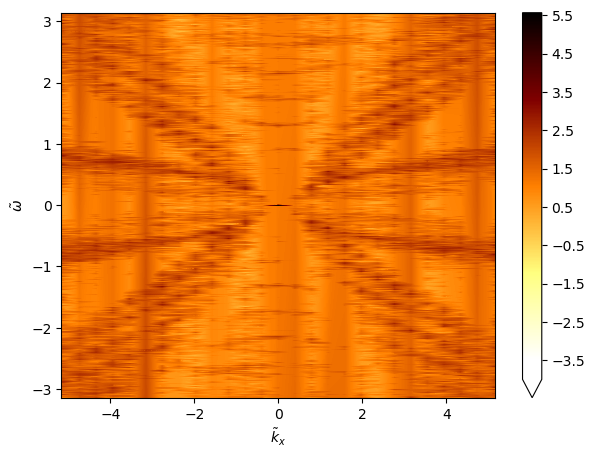

In [39]:
img.plot(vmin=-3.5)